In [1]:
# https://andreea-avramescu-datathon-app-mushrooms-app-lnlifq.streamlit.app/

In [2]:

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier





In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
# ! pip install category_encoders

In [5]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
# https://medium.com/mlearning-ai/category-encoders-c2a9bb192f0a
stscaler = StandardScaler()
mmscaler = MinMaxScaler()
onenc = OneHotEncoder()
labenc = LabelEncoder()
targenc = ce.TargetEncoder()
ordenc = ce.OrdinalEncoder()

In [6]:
# load dataset 
csv_path = "train.csv"
df_train = pd.read_csv(csv_path, sep = ',')  

csv_path = "test.csv"
df_test = pd.read_csv(csv_path, sep = ',')  

In [7]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
cap.shape,0,0.0
cap.color,0,0.0
bruises,0,0.0
stalk.color.above.ring,0,0.0
stalk.color.below.ring,0,0.0
population,0,0.0
Id,0,0.0
poisonous,0,0.0


In [8]:
# df_train.hist(figsize=(16,20))

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               6499 non-null   object
 1   cap.color               6499 non-null   object
 2   bruises                 6499 non-null   bool  
 3   stalk.color.above.ring  6499 non-null   object
 4   stalk.color.below.ring  6499 non-null   object
 5   population              6499 non-null   object
 6   Id                      6499 non-null   int64 
 7   poisonous               6499 non-null   int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 361.9+ KB


In [10]:
df_train.nunique()

cap.shape                    6
cap.color                   10
bruises                      2
stalk.color.above.ring       9
stalk.color.below.ring       9
population                   6
Id                        6499
poisonous                    2
dtype: int64

In [11]:
# df_train.head(10)

In [12]:
# target encoding pipeline
# cap.shape, cap.color, stalk.color.above.ring, stalk.color.below.ring, population


<AxesSubplot:>

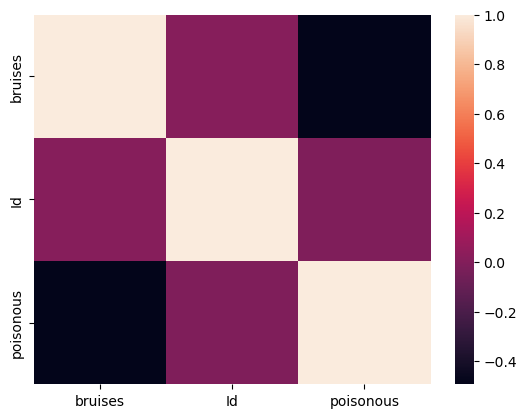

In [13]:
sns.heatmap(df_train.corr())

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

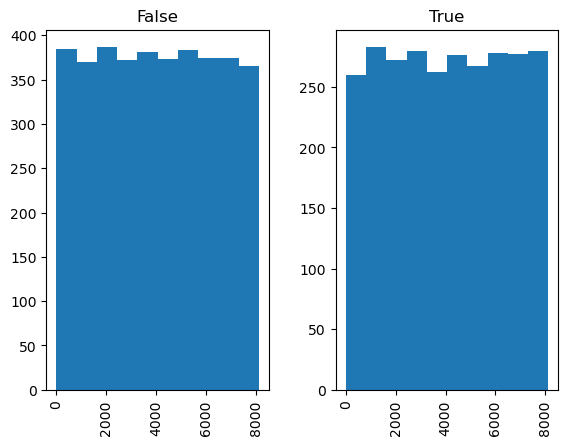

In [14]:
df_train.hist('Id','bruises')

In [15]:
df_train.isna().sum()

cap.shape                 0
cap.color                 0
bruises                   0
stalk.color.above.ring    0
stalk.color.below.ring    0
population                0
Id                        0
poisonous                 0
dtype: int64

In [16]:
df_train.drop('Id',axis=1,inplace=True)

In [17]:
X = df_train.copy()

In [18]:
y = X.pop('poisonous')

In [19]:
df_train.nunique()

cap.shape                  6
cap.color                 10
bruises                    2
stalk.color.above.ring     9
stalk.color.below.ring     9
population                 6
poisonous                  2
dtype: int64

In [20]:
X.head(1)

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
0,k,e,False,w,w,v


In [21]:
from sklearn.compose import ColumnTransformer

X_columns = X.columns


pr = ColumnTransformer(
    transformers=[
        # target encoders
        # ('enc_pipe', onenc, X_columns),
        ('tar_pipe', targenc, ['cap.shape','cap.color','stalk.color.above.ring','stalk.color.below.ring','population']),
        # ("lab_pipe", ordenc, ['bruises']),
        ('', 'passthrough', ['bruises']),
    ],
    remainder='drop'
)

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.7, shuffle=False)


In [23]:
X_train.shape

(4549, 6)

In [24]:
y_train.shape

(4549,)

In [25]:
# y_train

In [26]:
X_train.head(1)

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population
0,k,e,False,w,w,v


In [ ]:

rfreg_grid = {'n_estimators': [100, 150, 200, 250, 300],
              'max_depth': [3,5,7,11],
              'max_features':['sqrt', 'log2', None]
             }
grid000 = GridSearchCV(RandomForestRegressor(), rfreg_grid, cv = 10, scoring='accuracy')
grid000.fit(X_train, y_train)


In [ ]:
grid000.best_params_

In [ ]:
# rfreg_grid2 = {'randomforestregressor__n_estimators': [100, 150, 200, 250, 300],
#               'randomforestregressor__max_depth': [3,5,7,11],
#               'randomforestregressor__max_features':['sqrt', 'log2', None]
#              }
# cat_pipe = make_pipeline(pr, RandomForestRegressor())
# grid0 = GridSearchCV(cat_pipe, rfreg_grid2, cv = 10, scoring='accuracy')
# grid0.fit(X_train, y_train)



In [ ]:
# grid0.best_params_

In [ ]:
# grid0.best_score_

In [29]:
rfc = make_pipeline(pr, RandomForestClassifier(
    max_depth=3, max_features='sqrt', n_estimators=100))

In [30]:
rfc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('tar_pipe', TargetEncoder(),
                                                  ['cap.shape', 'cap.color',
                                                   'stalk.color.above.ring',
                                                   'stalk.color.below.ring',
                                                   'population']),
                                                 ('', 'passthrough',
                                                  ['bruises'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, max_features='sqrt'))])

In [31]:
y_train_pred0 = rfc.predict(X_train)



In [32]:
from sklearn.metrics import mean_squared_error as MSE
# Compute mse_dt train set
mse_dtree = MSE(y_train, y_train_pred0)

# Compute rmse_dt
rmse_dtree = mse_dtree**(1/2)

# Print rmse_dt
print("Train set RMSE of dtree: {:.2f}".format(rmse_dtree))

Train set RMSE of dtree: 0.32


In [33]:
results=cross_val_score(rfc,X,y,cv=10)



In [34]:
print(results)

[0.90461538 0.9        0.90153846 0.89538462 0.91230769 0.89384615
 0.89230769 0.87384615 0.88615385 0.88135593]


In [ ]:

# preprocessor = ColumnTransformer(
#     transformers=[
#         # target encoders
#         ('tar_pipe', targenc, ['cap.shape','cap.color','stalk.color.above.ring','stalk.color.below.ring','population']),
#         ("lab_pipe", ordenc, ['bruises']),
#     ]
# )

In [ ]:
# params1 = {'kneighborsregressor__n_neighbors': [1,3,5,10,50], 
#            'kneighborsregressor__weights':['uniform', 'distance']}


In [ ]:
# log_pipe = make_pipeline(preprocessor, KNeighborsRegressor())
# grid1 = GridSearchCV(log_pipe, params1, cv = 10, scoring='accuracy')
# grid1.fit(X_train, y_train)


In [37]:
finpred = rfc.predict(df_test)


In [38]:
from datetime import datetime

now = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
my_submission = pd.DataFrame({'Id': df_test.index, 'Poisonous': finpred})

my_submission.to_csv(f'talladen_submit_{now}.csv', index=False)